### 목표
- 손 글씨 숫자(0~9)를 분류하는 모델 만들어보자
- 선형 분류 모델의 예측불확실성을 확인
- 다양한 분류평가지표를 확인하자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

데이터 로딩

In [2]:
from sklearn.datasets import load_digits

In [3]:
# 흑백 손글씨
digit_data = load_digits()

In [4]:
X = digit_data['data']
y = digit_data['target']
print(X.shape, y.shape)

(1797, 64) (1797,)


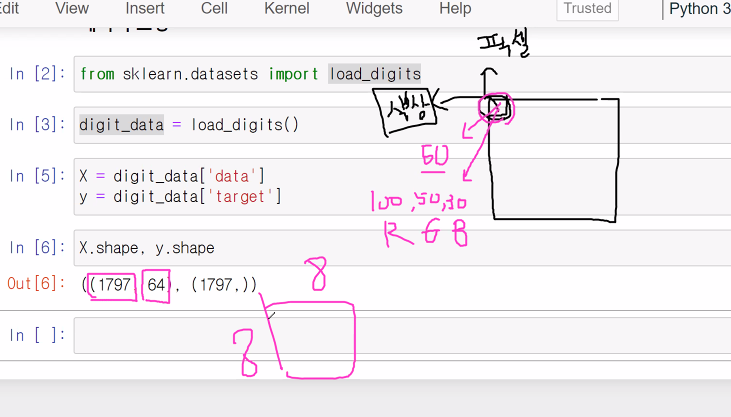

- X 데이터는 흑백사진에  8*8 (64) 개의 픽셀데이터로 구성되어 있다
- 원본 약 6만장인데 몇개만 추출해서 구성되어 있다
- 학습을 위해 전처리가 되어있다

In [5]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
# 손글씨 정답데이터 확인
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

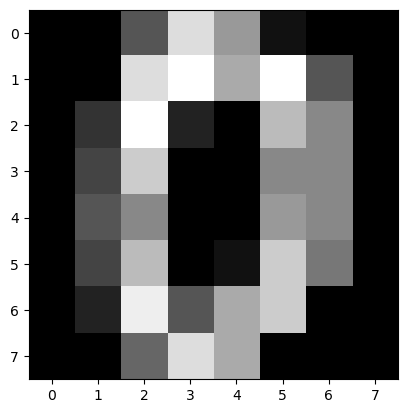

In [7]:
# 원본데이터에서 픽셀수를 줄여놔서 완벽히 확인은 불가능
plt.imshow(X[0].reshape(8,8), cmap='gray')

####  학습용/평가용 데이터 분리

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=501)

In [10]:
print("훈련용 문제 X: ", X_train.shape, "훈련용 답 y: ",  y_train.shape)
print("테스트용 문제 X: ", X_test.shape, "테스트용 답 y: ", y_test.shape)

훈련용 문제 X:  (1437, 64) 훈련용 답 y:  (1437,)
테스트용 문제 X:  (360, 64) 테스트용 답 y:  (360,)


#### 모델학습
- KNN, DecisionTree, Logistic, LinearSVM 모델 사용

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score # 교차검증

In [12]:
# 모델생성
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
logi=LogisticRegression()
svm=LinearSVC()

In [13]:
# 모델 교차검증
knn_score=cross_val_score(knn,X_train,y_train,cv=5)
tree_score=cross_val_score(tree,X_train,y_train,cv=5)
logi_score=cross_val_score(logi,X_train,y_train,cv=5)
svm_score=cross_val_score(svm,X_train,y_train,cv=5)

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [29]:
# 점수확인 : 정확도
print("knn:",knn_score.mean())
print("tree:",tree_score.mean())
print("logi:",logi_score.mean())
print("svm:",svm_score.mean())

knn: 0.985385210994967
tree: 0.834361691831204
logi: 0.9735578784359271
svm: 0.9450227448703059


In [ ]:
# svm은 특히 스케일링에 영향을 아주아주아주 많이 받음!!!
# 사용하려면 꼭 잘 처리하자!!!

#### 예측의 불확실성 -> 확률
- 분류모델은 예측을 하기전에 항상 먼저 확률을 계산한다.

In [14]:
logi.fit(X_train,y_train)

c:\Users\SMHRD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
# predict_proba : 확률 값으로 예측
# 확률 값은 범주(의 종류별로)마다 확률을 예측함!
print(logi.predict_proba(X_test[0:1,:]))
print(logi.predict(X_test[0:1,:]))

[[1.75088919e-07 5.32948056e-13 1.30592857e-05 2.21241446e-08
  1.25550095e-12 9.99962421e-01 5.18447533e-11 2.41630997e-05
  1.45610447e-07 1.39151736e-08]]
[5]


In [17]:
y_test[0]

5

In [19]:
# 가중치 확인
logi.coef_.shape

# (10, 64) : 총 10세트, 한 세트의 가중치 64개 -> 입력특성 64개 : 64개의 픽셀 데이터

(10, 64)

In [20]:
# 절편
logi.intercept_

array([-7.99566820e-05, -6.27307567e-02,  1.96698011e-03, -1.29640799e-03,
        3.35313893e-02, -9.22865831e-04, -2.52867540e-03,  1.03738557e-02,
        5.35898008e-02, -3.19033632e-02])

#### 분류모델의 평가지표
- 정확도
- 재현율
- 정밀도
- 오차행렬
- F1 스코어
- ROC, AUC

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report # 분류평가지표 리포팅

In [22]:
test_pre =logi.predict(X_test)

In [23]:
# confusion_matrix(실제 정답, 예측값)
confusion_matrix(y_test, test_pre)

array([[34,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  1,  0,  0,  0,  2,  0],
       [ 0,  2, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  1,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 42,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  1,  0, 38,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  2,  0, 26,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 31]], dtype=int64)

In [24]:
# classification_report(실제 정답, 예측값)
print(classification_report(y_test,test_pre))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        35
           1       0.89      0.91      0.90        35
           2       0.95      0.95      0.95        39
           3       0.97      0.95      0.96        40
           4       0.93      0.95      0.94        44
           5       0.95      0.93      0.94        41
           6       1.00      0.90      0.95        29
           7       0.97      1.00      0.99        34
           8       0.88      0.93      0.90        30
           9       0.94      0.94      0.94        33

    accuracy                           0.94       360
   macro avg       0.95      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360

